## UnitVelo Import libraries


In [1]:
import unitvelo as utv
import anndata
import scvelo as scv
import numpy as np
import os
import argparse
import time
import anndata
import numpy as np
import scvelo as scv
import scanpy as sc
import sys
import torch
import os
import anndata as ad
import pandas as pd
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

(Running UniTVelo 0.2.5.2)
2024-10-06 00:42:15


## Load cell cycle dataset, run UnitVelo and save the output in adata

In [2]:
adata = sc.read("/gpfs/home/jw7078/cell_cycle_processed.h5ad")

In [3]:
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = True
velo_config.IROOT = None
velo_config.FIT_OPTION = '1'
velo_config.AGENES_R2 = 1
velo_config.GPU = -1

------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /gpfs/home/jw7078/VeloVI-RegVelo-time_bug_fix/VeloVAE/notebooks.
Results will be stored in res folder
Filtered out 16 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Extracted 379 highly variable genes.
Computing moments for 379 genes with n_neighbors: 30 and n_pcs: 30
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)

# of velocity genes 359 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 308 (Criterion: std of un/spliced reads should be moder

Loss (Total): 633161.429, (Spliced): 330716.701, (Unspliced): 302444.727: 100%|█████████▉| 11999/12000 [03:25<00:00, 49.57it/s] 

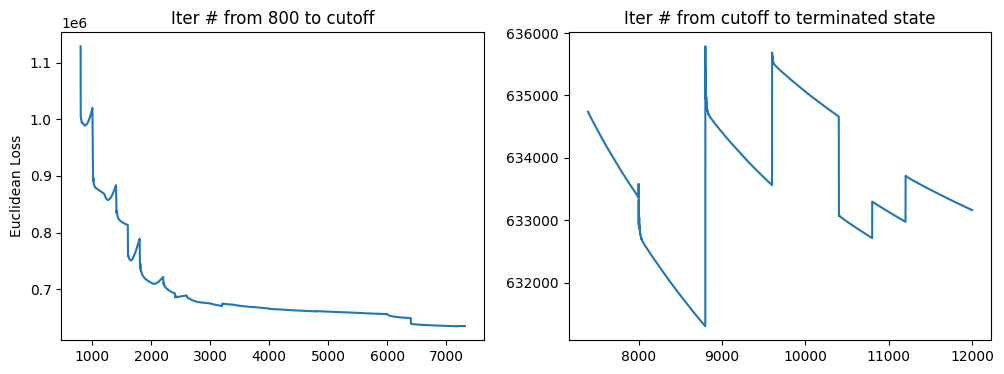

Loss (Total): 633161.429, (Spliced): 330716.701, (Unspliced): 302444.727: 100%|█████████▉| 11999/12000 [03:27<00:00, 57.88it/s]

Total loss 631298.883, vgene loss 633161.429


  0%|          | 0/1146 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


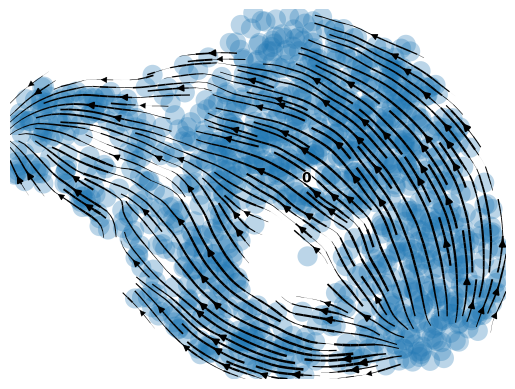

In [4]:
adata.obs["cluster"] = "0"
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

adata = utv.run_model(adata, label='cluster', config_file=velo_config)
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='')


In [5]:
adata

AnnData object with n_obs × n_vars = 1146 × 379
    obs: 'phase', 'fucci_time', 'pseudo_clusters', 'pseudo_clusters_equal_size', 'pseudo_clusters_equal_size_num', 'cell_cycle_rad', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'cluster', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'scaling', 'fit_vars', 'fit_varu', 'fit_gamma', 'fit_beta', 'fit_offset', 'fit_a', 'fit_t', 'fit_h', 'fit_intercept', 'fit_loss', 'fit_llf', 'fit_sr2', 'fit_ur2'
    uns: 'neighbors', 'pca', 'umap', 'velocity_params', 'temp', 'datapath', 'label', 'base_function', 'basis', 'par_names', 'loss', 'velocity_graph', 'velocity_graph_neg', 'cluster_colors'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'velocity', 

In [6]:
adata.write('unitvelo_cycle_filteredgene.h5ad')